## <h1><center> Networks II Models and Applications</center></h1>
<h1><center> Pearl Herrero</center></h1>



To demonstrate that in a strongly connected and aperiodic society, if the trust values between agents satisfy $T_{ji} = T_{ij}$ for all agents $i$, it implies that every agent has equal influence, we need to establish that the beliefs of all agents eventually converge to the same value.

Let's denote the belief of agent $i$ at time $t$ as $x_i(t)$. According to the DeGroot model, the belief of agent $i$ at time $t+1$ can be expressed as:

\begin{equation}
x_i(t+1) = \sum_{j \in N_i} T_{ij} x_j(t)
\end{equation}

where $N_i$ represents the set of neighbors of agent $i$.

Since $T_{ji} = T_{ij}$ for all agents $i$, we can rewrite the above equation as:

\begin{equation}
x_i(t+1) = \sum_{j \in N_i} T_{ji} x_j(t)
\end{equation}

This indicates that the update rule for agent $i$ depends solely on the beliefs of its neighbors and not on its own belief. In a strongly connected and aperiodic society, each agent has a path to every other agent, ensuring that every agent's belief influences the beliefs of all other agents.

Now, let's consider a stronger proposition: in a strongly connected and aperiodic society, if $\sum_{j} T_{ji} = 1$ for all agents $i$, then every agent has the same influence.

If $\sum_{j} T_{ji} = 1$ for all agents $i$, it implies that the row sum of the matrix $T$ is equal to 1. This property indicates that the eigenvector corresponding to the eigenvalue 1 is a vector of all ones. Let $\boldsymbol{s}$ represent this eigenvector. By utilizing the eigenvector property, we can state:

\begin{equation}
\sum_{j} T_{ij} s_j = s_i \text{ for all } i
\end{equation}

This implies that the influence of agent $i$ is a weighted sum of the influences of its neighbors (individuals $j$ who pay attention to $i$). The influence of agent $j$ is weighted by $T_{ji}$, which represents the trust that agent $j$ places in agent $i$. In a strongly connected and aperiodic society, each agent has a path to every other agent, which ensures that the influence of every agent affects the influence of all other agents.

Now, let's assume the existence of two agents $i$ and $j$ with different influences, where the influence of agent $i$ is greater than that of agent $j$. In this case, we have:

\begin{equation}
\sum_{k} T_{ik} s_k > \sum_{k} T_{jk} s_k \text{ for all } k
\end{equation}

By multiplying both sides of the inequality by $s_i$ and $s_j$ respectively, and summing over all $k$, we obtain:

\begin{equation}
\sum_{k} T_{ik} s_i s_k > \sum_{k} T_{jk} s_j s_k \text{ for all } k
\end{equation}

However, this contradicts the fact that the eigenvector $\boldsymbol{s}$ corresponds to the eigenvalue 1, which implies that $\sum_{k} T_{ik} s_i = \sum_{k} T_{jk} s_j =


### QUESTION 3

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
import pandas as pd
import statistics
import pickle

os.chdir('C:/Users/herre/OneDrive/Desktop/Networks/PS2')


In [ ]:
def load_data(filename):
    mat = loadmat(filename)
    adjacency_matrix = mat['A']
    g = nx.from_numpy_array(adjacency_matrix)
    largest_component = max(nx.connected_components(g), key=len)
    return g.subgraph(largest_component)

In [ ]:
subgraphs = []
for filename in os.listdir('facebook100'):
    if filename.endswith('.mat'):
        print(f"Processing {filename}...")
        subgraph = load_data(os.path.join('facebook100', filename))
        subgraphs.append(subgraph)

Processing Villanova62.mat...
Processing UCLA26.mat...
Processing Tennessee95.mat...
Processing NYU9.mat...
Processing Carnegie49.mat...
Processing GWU54.mat...
Processing USF51.mat...
Processing Vanderbilt48.mat...
Processing USC35.mat...
Processing Rutgers89.mat...
Processing UConn91.mat...
Processing MIT8.mat...
Processing USFCA72.mat...
Processing UChicago30.mat...
Processing UIllinois20.mat...
Processing UC61.mat...
Processing Cal65.mat...
Processing Yale4.mat...
Processing Northeastern19.mat...
Processing Dartmouth6.mat...
Processing Vermont70.mat...
Processing Northwestern25.mat...
Processing William77.mat...
Processing Harvard1.mat...
Processing Princeton12.mat...
Processing UC64.mat...
Processing Middlebury45.mat...
Processing Haverford76.mat...
Processing Bingham82.mat...
Processing UNC28.mat...
Processing Berkeley13.mat...
Processing Rochester38.mat...
Processing Swarthmore42.mat...
Processing Virginia63.mat...
Processing WashU32.mat...
Processing Columbia2.mat...
Processing

Saving this computationally expensive subggraphs list.

In [ ]:
with open('subgraphs.pkl', 'wb') as file:
    pickle.dump(subgraphs, file)

In [ ]:
with open('subgraphs.pkl', 'rb') as file:
    subgraphs = pickle.load(file)

##### (a) To simplify things we will assume that each node "listens" to all her neighbors (and herself) with the same probability. In other words, we assume that $T_{ij} = \frac{1}{1 + d_i}$ for all $j \in N_i$ and also  $T_{ii} = \frac{1}{1 + d_i}$.

In [ ]:
def compute_T(g):
    T = {}
    for node in g.nodes():
        neighbors = list(g.neighbors(node))
        d = len(neighbors)
        t = 1 / (1 + d)
        T[node] = {neighbor: t for neighbor in neighbors}
        T[node][node] = t
    return T


##### (b) Since we don’t have any way of performing sentiment analysis on this data, we will instead simulate innate/original opinions from a uniform(0,1). In other words, assign to each node a $p_i(0)$ that is drawn from a uniform random variable

In [ ]:
def assign_p0(g):
    p0 = {node: np.random.uniform(0, 1) for node in g.nodes()}
    return p0


In [ ]:
def power_iteration(matrix, num_iterations=1000, tol=1e-6):
    n = matrix.shape[0]
    vector = np.random.rand(n)
    vector /= np.linalg.norm(vector)

    for _ in range(num_iterations):
        new_vector = np.dot(matrix, vector)
        new_vector /= np.linalg.norm(new_vector)

        if np.linalg.norm(new_vector - vector) < tol:
            break

        vector = new_vector

    largest_eigenvalue = np.dot(np.dot(matrix, vector), vector) / np.dot(vector, vector)

    # Deflate the matrix to find the second-largest eigenvalue
    deflated_matrix = matrix - largest_eigenvalue * np.outer(vector, vector)

    second_vector = np.random.rand(n)
    second_vector /= np.linalg.norm(second_vector)

    for _ in range(num_iterations):
        new_second_vector = np.dot(deflated_matrix, second_vector)
        new_second_vector /= np.linalg.norm(new_second_vector)

        if np.linalg.norm(new_second_vector - second_vector) < tol:
            break

        second_vector = new_second_vector

    second_largest_eigenvalue = np.dot(np.dot(deflated_matrix, second_vector), second_vector) / np.dot(second_vector, second_vector)

    return largest_eigenvalue, vector, second_largest_eigenvalue

def calculate_s(T):
    _, s, second_largest_eigenvalue = power_iteration(T.T)
    return s, second_largest_eigenvalue


In [ ]:
def degroot(transition_matrix, initial_opinions, tolerance=1e-6):
    opinions = initial_opinions.copy()
    delta = 1
    opinions_history = [opinions.copy()]

    while delta > tolerance:
        delta = 0
        new_opinions = opinions.copy()

        for node, neighbors in transition_matrix.items():
            new_opinion = sum(transition_matrix[node][neighbor] * opinions[neighbor] for neighbor in neighbors)
            delta = max(delta, abs(new_opinion - opinions[node]))
            new_opinions[node] = new_opinion

        opinions = new_opinions
        opinions_history.append(opinions.copy())

    return opinions, opinions_history


##### (c) Since we have only one component and all edges are bi-directional (and we assume everyone pays some attention to themselves) then we should obtain convergence to consensus. Compute the influence vector for each network and report a histogram of the influences obtained across all vectors. What is the maximum influence? and the median influence?

In [ ]:
def plot_histogram(values, title):
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    plt.hist(values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    plt.title(title, fontsize=18)
    plt.xlabel('Influence', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', alpha=0.5)
    plt.show()


In [ ]:
import time

def analyze_opinion_dynamics(g):
    start_time = time.time()

    transition_matrix_dict = compute_T(g)
    nodes = list(g.nodes())
    n = len(nodes)
    transition_matrix_np = np.zeros((n, n))
    for i, node in enumerate(nodes):
        for j, neighbor in enumerate(nodes):
            if neighbor in transition_matrix_dict[node]:
                transition_matrix_np[i, j] = transition_matrix_dict[node][neighbor]
    print("compute_transition_matrix time:", time.time() - start_time)

    start_time = time.time()
    initial_opinions = assign_p0(g)
    print("assign_initial_opinions time:", time.time() - start_time)

    start_time = time.time()
    influence_vector, second_eigenvalue = calculate_s(transition_matrix_np)
    print("calculate_influence_vector time:", time.time() - start_time)

    start_time = time.time()
    final_opinions, opinions_history = degroot(transition_matrix_dict, initial_opinions)
    print("degroot time:", time.time() - start_time)

    return final_opinions, influence_vector, opinions_history, second_eigenvalue

In [ ]:
all_final_opinions = []
all_influence_vectors =[]
iterations = []
opinions_history_all = []
all_second_eigenvalues = []
for i, subgraph in enumerate(subgraphs):
    print(f'Working on subgraph number {i + 1}')
    final_opinions, influence_vector, opinions_history, second_eigenvalue = analyze_opinion_dynamics(subgraph)
    all_final_opinions.extend(final_opinions.values())
    all_influence_vectors.extend(influence_vector)
    opinions_history_all.extend(opinions_history)
    all_second_eigenvalues.append(second_eigenvalue)
    iterations.append(i)


Working on subgraph number 1
compute_transition_matrix time: 3.4148941040039062
assign_initial_opinions time: 0.015726089477539062
calculate_influence_vector time: 6.722639799118042
degroot time: 4.733193874359131
Working on subgraph number 2
compute_transition_matrix time: 21.063088178634644
assign_initial_opinions time: 0.024916887283325195
calculate_influence_vector time: 52.6827609539032
degroot time: 16.69032096862793
Working on subgraph number 3
compute_transition_matrix time: 15.22661280632019
assign_initial_opinions time: 0.021195173263549805
calculate_influence_vector time: 18.2208149433136
degroot time: 10.154151916503906
Working on subgraph number 4
compute_transition_matrix time: 23.392648935317993
assign_initial_opinions time: 0.02774810791015625
calculate_influence_vector time: 75.39256000518799
degroot time: 11.685522079467773
Working on subgraph number 5
compute_transition_matrix time: 2.615428924560547
assign_initial_opinions time: 0.00832223892211914
calculate_influen

In [ ]:
with open('all_final_opinions.pkl', 'wb') as file:
    pickle.dump(all_final_opinions, file)

with open('influencevector.pkl', 'wb') as file:
    pickle.dump(all_influence_vectors, file)

with open('allhistory.pkl', 'wb') as file:
    pickle.dump(opinions_history_all, file)

with open('allsecondeigen.pkl', 'wb') as file:
    pickle.dump(all_second_eigenvalues, file)

In [ ]:
with open('all_final_opinions.pkl', 'rb') as file:
    all_final_opinions = pickle.load(file)

with open('influencevector.pkl', 'rb') as file:
    all_influence_vectors = pickle.load(file)

with open('allhistory.pkl', 'rb') as file:
    opinions_history_all = pickle.load(file)

with open('allsecondeigen.pkl', 'rb') as file:
   all_second_eigenvalues = pickle.load(file)

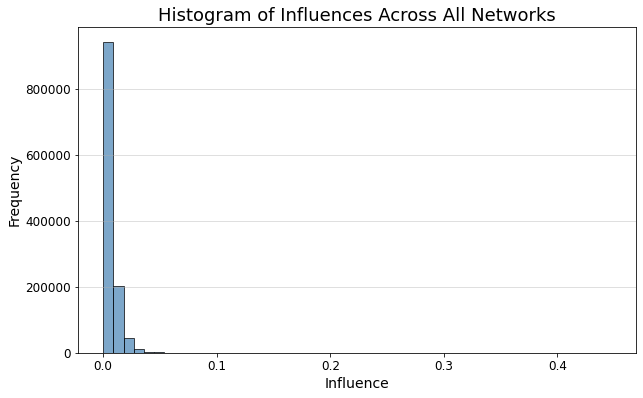

Max influence: 0.4467880398943755, Median influence: 0.004146305728990406


In [ ]:
plot_histogram(all_influence_vectors, "Histogram of Influences Across All Networks")
max_influence = max(all_influence_vectors)
median_influence = np.median(all_influence_vectors)
print(f"Max influence: {max_influence}, Median influence: {median_influence}")


We observe a histogram that is heavily skewed to the right, where the max influence is noticeably higher than the median influence. This shows that most individuals have very low influence on others and only few have an unusually disproportionate level of influence.

In [ ]:
with open('iterations.pkl', 'wb') as file:
    pickle.dump(iterations, file)

### (d) Plot a histogram of the consensus opinions across all networks. Which is the most popular (i.e. modal) opinion?

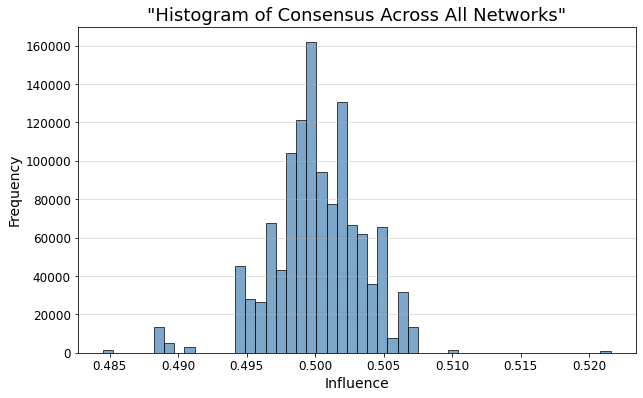

In [ ]:
plot_histogram(all_final_opinions, '"Histogram of Consensus Across All Networks"')

It makes sense that our final opinions have a distribution around the same value, this shows that we have converged into a consensus, which is expected.

In [ ]:
statistics.mode(all_final_opinions)

0.5007535109388085

We observe that at consensus, the distribution of opinions, which were initially uniformly distributed from 0 to 1, now converges to a much narrower distribution. The distribution is still centered around a mean of ~0.50 which is also equal to the modal opinion, but the distribution now only ranges within +/- 0.15 from the mean. This reflects the concept of consensus wherein most of individuals show the same or similar opinions at convergennce.

##### (e) Now we want to test the speed of learning. For each network, calculate the first period, $t^*$, where $(\Sigma_i ˜d_i(A)(p_i(t)−pi(∞))^2)^{0.5} < ε$ for $ε = 0.1$ and $˜di(A)= \frac{di(A)}{\Sigma_i di(A)} $.

In [ ]:
def calc_time_to_consensus(g, T, second_eigval, eps=0.1):
    degrees = np.array(list(dict(g.degree()).values()))
    inv_degrees = np.diag(1 / degrees)

    # Calculate p_inf
    p_inf = np.ones(T.shape[0]) / T.shape[0]

    pt = p_inf
    t = 0

    while True:
        pt_new = inv_degrees @ (T @ pt)
        diff = np.linalg.norm(pt_new - pt, ord=2)

        if diff < eps * (1 - second_eigval):
            t_star = t
            break

        pt = pt_new
        t += 1

    return t_star, pt

In [ ]:
time_to_consensus = []

for i, subgraph in enumerate(subgraphs):
    print(f'Working on subgraph number {i + 1}')

    transition_matrix_dict = compute_T(subgraph)
    nodes = list(subgraph.nodes())
    n = len(nodes)
    transition_matrix_np = np.zeros((n, n))
    for row, node in enumerate(nodes):
        for col, neighbor in enumerate(nodes):
            if neighbor in transition_matrix_dict[node]:
                transition_matrix_np[row, col] = transition_matrix_dict[node][neighbor]

    t_star = calc_time_to_consensus(subgraph, transition_matrix_np, all_second_eigenvalues[i])
    time_to_consensus.append(t_star)


Working on subgraph number 1
Working on subgraph number 2
Working on subgraph number 3
Working on subgraph number 4
Working on subgraph number 5
Working on subgraph number 6
Working on subgraph number 7
Working on subgraph number 8
Working on subgraph number 9
Working on subgraph number 10
Working on subgraph number 11
Working on subgraph number 12
Working on subgraph number 13
Working on subgraph number 14
Working on subgraph number 15
Working on subgraph number 16
Working on subgraph number 17
Working on subgraph number 18
Working on subgraph number 19
Working on subgraph number 20
Working on subgraph number 21
Working on subgraph number 22
Working on subgraph number 23
Working on subgraph number 24
Working on subgraph number 25
Working on subgraph number 26
Working on subgraph number 27
Working on subgraph number 28
Working on subgraph number 29
Working on subgraph number 30
Working on subgraph number 31
Working on subgraph number 32
Working on subgraph number 33
Working on subgraph

In [ ]:
unique_values_count = len(set(time_to_consensus))
print(unique_values_count)

3


In [ ]:
with open('tstar.pkl', 'wb') as file:
    pickle.dump(t_star, file)

##### (f) Construct a plot with the second eigenvalue of the network on the x-axis and $t*$ on the y-axis. Do you get the relationship you expected? What happens as you lower the value of epsilon?

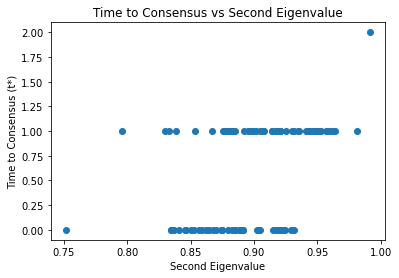

In [ ]:
plt.scatter(all_second_eigenvalues, time_to_consensus)
plt.xlabel('Second Eigenvalue')
plt.ylabel('Time to Consensus (t*)')
plt.title('Time to Consensus vs Second Eigenvalue')
plt.show()

In terms of the relationship between the second eigenvalue and the time required to achieve consensus, there is a general expectation that networks with a higher second eigenvalue will experience a longer convergence time. This is because convergence tends to be slower in such networks. When the convergence criterion (ε) is decreased, meaning a stricter condition for convergence is imposed, it is likely that the time to reach consensus will increase. This is due to the increased difficulty of satisfying the more stringent convergence requirement, leading to a higher number of iterations necessary for the algorithm to converge. In the given example, we observe a significantly large second eigenvalue close to 0.99, which required 2 iterations to achieve consensus.

##### (g) Now assume that the $p_i(0)$ that you obtained from the uniform distribution above is in fact the innate opinion $s_i$ of agent $i$. Simulate a susceptibility parameter $\alpha_i$ also from the Uniform (0,1) for each agent $i$ and solve, for each network, the steady-state value $p*$ under the Friedkin-Johnsen model. Construct a histogram of $p*$ across all networks. What is the most popular opinion? How does your answer change if $α_i$ is distributed Uniform (0.5, 1)?

$p(t) = (1-α_i) \Sigma T_{ij} * p_j(t-1) + (α_i) (s_i) $

In [ ]:
def assign_alphas(g, uniform_range):
    alphas = {node: np.random.uniform(uniform_range[0], uniform_range[1]) for node in g.nodes()}
    return alphas

In [ ]:
def friedkin_johnsen(transition_matrix, initial_opinions, alpha, tolerance=1e-6):
    opinions = initial_opinions.copy()
    delta = 1

    while delta > tolerance:
        delta = 0
        new_opinions = opinions.copy()

        for node, neighbors in transition_matrix.items():
            new_opinion = sum(transition_matrix[node][neighbor] * opinions[neighbor] for neighbor in neighbors)
            new_opinion = alpha[node] * new_opinion + (1 - alpha[node]) * initial_opinions[node]
            delta = max(delta, abs(new_opinion - opinions[node]))
            new_opinions[node] = new_opinion

        opinions = new_opinions

    return opinions

In [ ]:

all_steady_states = []

for i, subgraph in enumerate(subgraphs):
    print(f'Working on subgraph number {i + 1}')

    transition_matrix_dict = compute_T(subgraph)
    initial_opinions = assign_p0(subgraph)
    alpha = assign_alphas(subgraph, (0, 1))

    final_opinions = friedkin_johnsen(transition_matrix_dict, initial_opinions, alpha)
    all_steady_states.extend(final_opinions.values())


Working on subgraph number 1
Working on subgraph number 2
Working on subgraph number 3
Working on subgraph number 4
Working on subgraph number 5
Working on subgraph number 6
Working on subgraph number 7
Working on subgraph number 8
Working on subgraph number 9
Working on subgraph number 10
Working on subgraph number 11
Working on subgraph number 12
Working on subgraph number 13
Working on subgraph number 14
Working on subgraph number 15
Working on subgraph number 16
Working on subgraph number 17
Working on subgraph number 18
Working on subgraph number 19
Working on subgraph number 20
Working on subgraph number 21
Working on subgraph number 22
Working on subgraph number 23
Working on subgraph number 24
Working on subgraph number 25
Working on subgraph number 26
Working on subgraph number 27
Working on subgraph number 28
Working on subgraph number 29
Working on subgraph number 30
Working on subgraph number 31
Working on subgraph number 32
Working on subgraph number 33
Working on subgraph

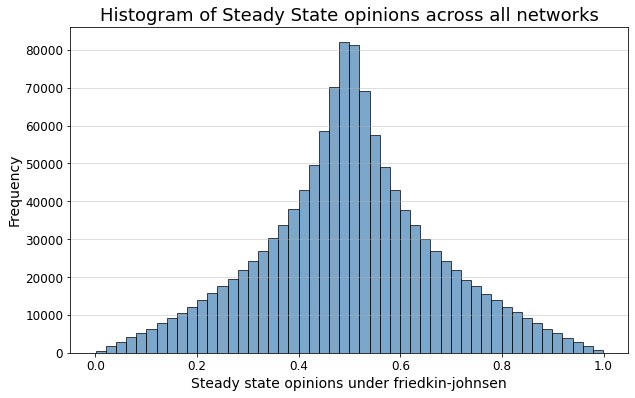

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.hist(all_steady_states, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Steady State opinions across all networks', fontsize=18)
plt.xlabel('Steady state opinions under friedkin-johnsen', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

Compared to a regular DeGroot model observed in part d, the distribution of opinions in a Friedkin-Johnsen model converges less. While the distribution of final opinions of the former model narrows, that of the latter model remains within the range of 0 and 1. This shows that because people retain some of their initial beliefs, less popular opinions (those around 0 and 1) can still be observed even at convergence. In this example, an initially uniform distribution does converge, where the histogram becomes  more bell-shaped and most opinions now mostly located at the mean - thus the most popular opinion is located at the mean.

In [ ]:
all_steady_states_2 = []

for i, subgraph in enumerate(subgraphs):
    print(f'Working on subgraph number {i + 1}')

    transition_matrix_dict = compute_T(subgraph)
    initial_opinions = assign_p0(subgraph)
    alpha = assign_alphas(subgraph, (0.5, 1))

    final_opinions = friedkin_johnsen(transition_matrix_dict, initial_opinions, alpha)
    all_steady_states_2.extend(final_opinions.values())

Working on subgraph number 1
Working on subgraph number 2
Working on subgraph number 3
Working on subgraph number 4
Working on subgraph number 5
Working on subgraph number 6
Working on subgraph number 7
Working on subgraph number 8
Working on subgraph number 9
Working on subgraph number 10
Working on subgraph number 11
Working on subgraph number 12
Working on subgraph number 13
Working on subgraph number 14
Working on subgraph number 15
Working on subgraph number 16
Working on subgraph number 17
Working on subgraph number 18
Working on subgraph number 19
Working on subgraph number 20
Working on subgraph number 21
Working on subgraph number 22
Working on subgraph number 23
Working on subgraph number 24
Working on subgraph number 25
Working on subgraph number 26
Working on subgraph number 27
Working on subgraph number 28
Working on subgraph number 29
Working on subgraph number 30
Working on subgraph number 31
Working on subgraph number 32
Working on subgraph number 33
Working on subgraph

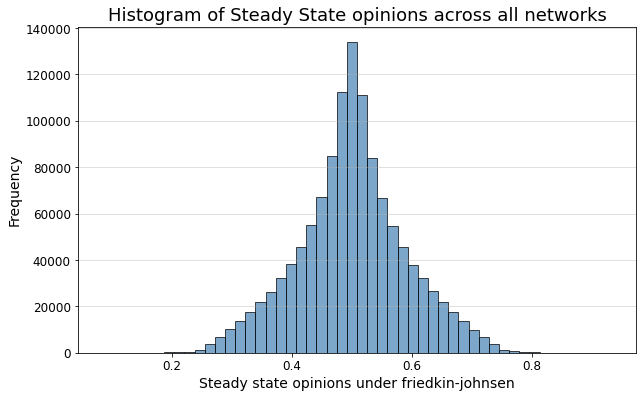

In [ ]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.hist(all_steady_states_2, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Steady State opinions across all networks', fontsize=18)
plt.xlabel('Steady state opinions under friedkin-johnsen', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

An $\alpha_i$ with a narrower distribution of Uniform (0.5,1) means that there is less variability in the level of susceptibility across individuals. In this case, more inidividuals rely on their innate beliefs and are thus less susceptible to others' opinions. Thus, it is surprising to observe that the distribution is narrower than  when $\alpha_i$ is Uniform (0,1) given that individuals should hang on to their initial beliefs more.